# Data Preparation

In [26]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization

In [11]:
data = pd.read_csv("../dataset/train.csv")
data.head(10)

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   
5     6       650007       844846      6  148846       2          9       13   
6     7       633344       756063      5   78025       1          9       15   
7     8       662990       891569      6   76546       1          2       12   
8     9       543184       841354      7   57662       4          7       14   
9    10       573043       879481      2  132347       2          3       12   

   top speed   hp  torque  current price  
0        177   73     123       351318.0  
1        148   74      95       285001.5  
2        181   53      97       215386.0  
3        197   54     116       244295.5  
4        160   53     105       531114.5  
5        138   61     109       177933.5  
6        171   94     132       410877.0  
7        146  109      96       467471.5  
8        151   50     132       462397.5  
9        200  115      82       197266.0

In [15]:
data.shape

(1000, 12)

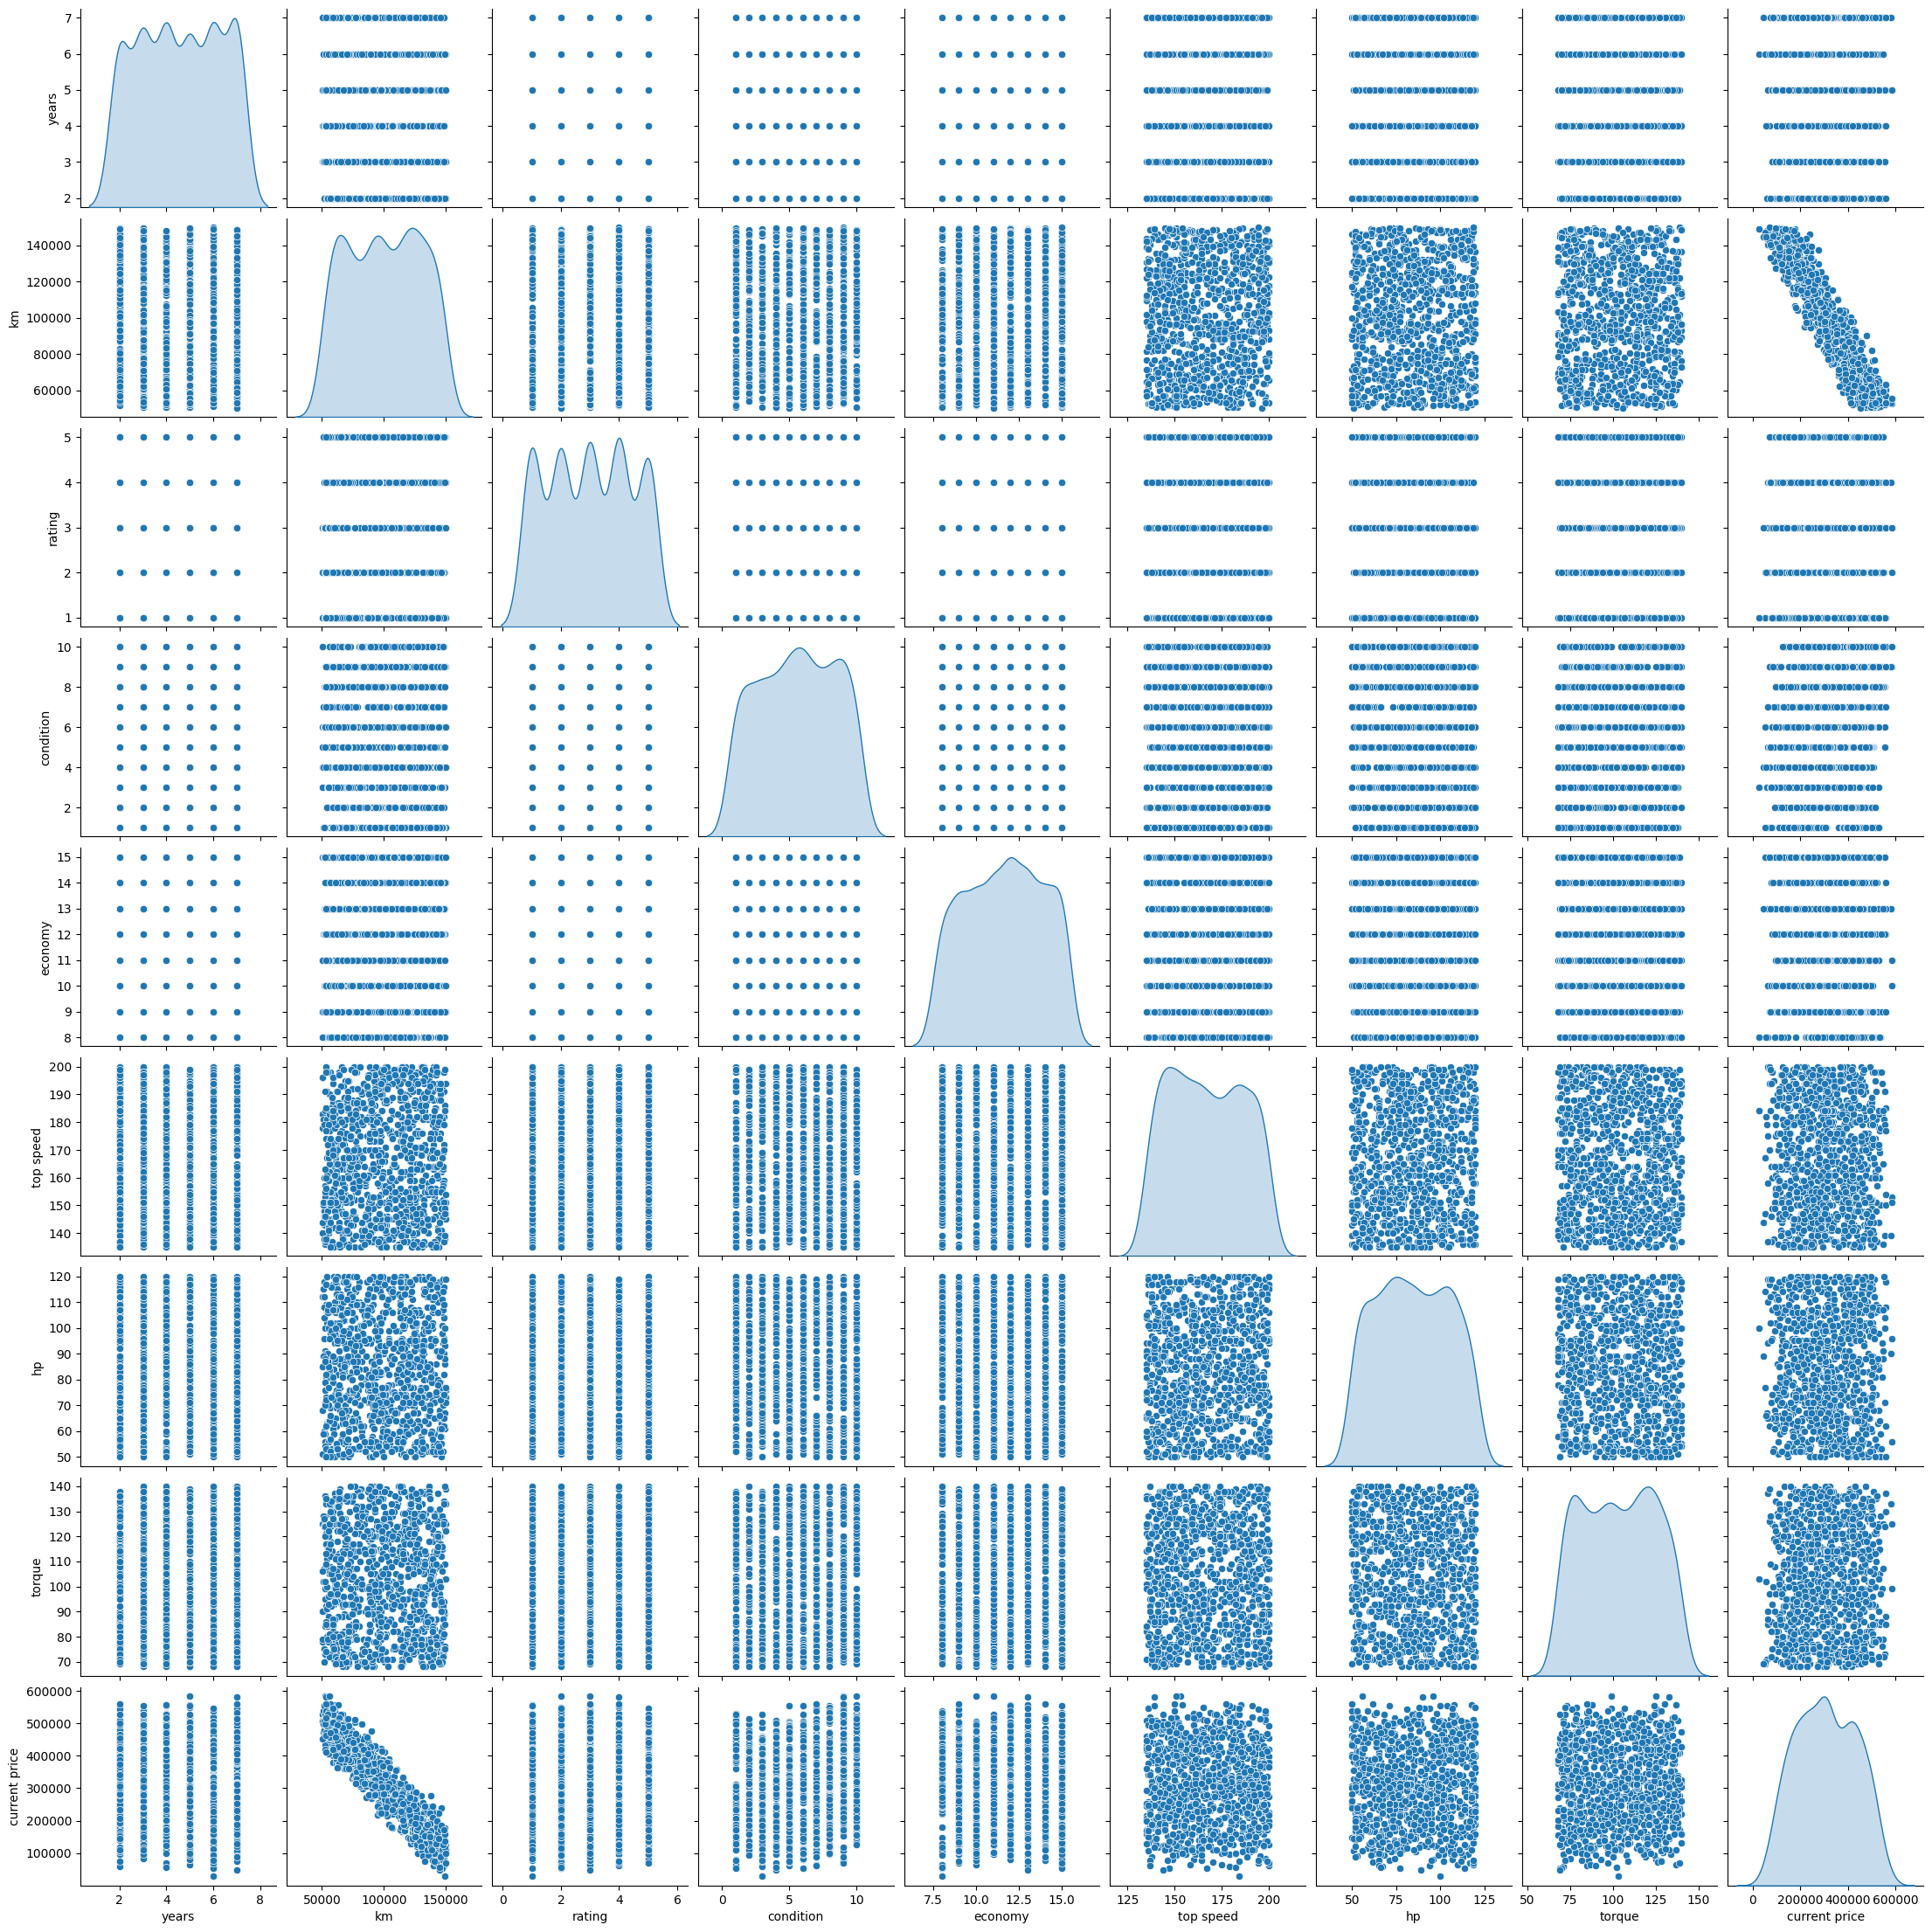

In [13]:
sns.pairplot(data[['years','km','rating','condition','economy','top speed','hp','torque','current price']],diag_kind="kde")

### Shuffled Data

In [16]:
shuffled_data = tf.random.shuffle(data)

In [24]:
X = shuffled_data[:,3:-1]
y = tf.expand_dims(shuffled_data[:,-1],-1)

In [25]:
print (X.shape)
print (y.shape)


(1000, 8)
(1000, 1)


In [27]:
normalizer = Normalization()
normalizer.adapt(X)
X_normalized = normalizer(X)

In [28]:
print(X_normalized)

tf.Tensor(
[[-0.9084984  -0.27132967  1.4350008  ...  0.47238556 -0.7093297
   1.6427548 ]
 [-0.9084984  -0.77469516  1.4350008  ...  1.6135395  -0.5142713
   1.3576945 ]
 [-0.9084984   0.1339781  -0.7046623  ... -0.56502706  0.46102062
  -0.82776725]
 ...
 [ 0.25549707  0.8517871  -1.4178834  ...  0.2130324   0.50978523
  -0.3051568 ]
 [-0.32650065  0.5251795  -0.7046623  ...  1.4579276  -0.7580943
  -0.49519697]
 [-0.32650065  0.4676903  -0.7046623  ... -1.4468278   0.36349145
  -1.6829479 ]], shape=(1000, 8), dtype=float32)
